# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# Client, used car dealers,  might be manully pricing the inventory. This dataset is considrably large which has information about various traits of a car. 
# We can use data driven approch to determine/predict the car price. We need to answer which features of the car drives the price. 
# e.g. manufacturer, condition, year, state

# We can use various models to determine/predict the price of the car. We can use various deatures of the car and take actionable recommendations for the client
# on which type of cars to acquire and how to proce them effectively. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
import warnings
warnings.filterwarnings('ignore')


In [110]:
data = pd.read_csv('data/vehicles.csv')
#data.head()
data.info()
pd.set_option('display.float_format', '{:.2f}'.format)
print (data.describe())
row_count = len(data)
print (f"Total rows: {row_count}")
missing_data = data.isnull().sum();
#Missing/NaN values in each column
print(missing_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [111]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
#Percentage of missing/NaN values in each column
print(missing_percentage)

#unique_car = data['region'].nunique()
#print(unique_car)



id              0.00
region          0.00
price           0.00
year            0.28
manufacturer    4.13
model           1.24
condition      40.79
cylinders      41.62
fuel            0.71
odometer        1.03
title_status    1.93
transmission    0.60
VIN            37.73
drive          30.59
size           71.77
type           21.75
paint_color    30.50
state           0.00
dtype: float64


In [112]:
price_zero_count = (data['price'] == 0).sum()
print (f"Total rows: {price_zero_count}")
total_values = len(data['price']) 
percentage_zeros = (price_zero_count / total_values) * 100
print(f"Percentage of zeros in 'price': {percentage_zeros:.2f}%")
#7.71% of the data has 0 in price 


Total rows: 32895
Percentage of zeros in 'price': 7.71%


In [113]:
# 0.705819% of 'fuel' had NaN which is filled with 'other'. 0.598763% of 'transmission' has NaN which is 'other'
# Drop 'VIN' 
data['fuel'] = data['fuel'].fillna('other')
data['transmission'] = data['transmission'].fillna('other')  
data = data.drop('VIN', axis=1) 


In [114]:
#As trying to predict 'price' filter out rows with 0 price. Also ignoring 'price' > 500k as it might ske the data
ninety_ninth_percentile_price = data['price'].quantile(0.99)

print(f'The 99th percentile price is: {ninety_ninth_percentile_price: .2f}')

#data_filtered = data[(data['price'] > 0) & (data['price'] <= ninety_ninth_percentile_price)]
data_filtered = data[(data['price'] > 0) & (data['price'] <= 500000)]
print (len(data_filtered))
missing_data_filtered = data_filtered.isnull().sum();
print(missing_data_filtered)


The 99th percentile price is:  66995.00
393917
id                   0
region               0
price                0
year              1173
manufacturer     16174
model             4678
condition       151349
cylinders       160370
fuel                 0
odometer          2290
title_status      7734
transmission         0
drive           120212
size            282885
type             85888
paint_color     117104
state                0
dtype: int64


In [115]:
missing_percentage_filtered = (data_filtered.isnull().sum() / len(data_filtered)) * 100
print(missing_percentage_filtered)

print (data_filtered.describe())
print (data_filtered.describe(include='object'))

#unique_car = data_filtered['fuel'].unique()
#print(unique_car)

id              0.00
region          0.00
price           0.00
year            0.30
manufacturer    4.11
model           1.19
condition      38.42
cylinders      40.71
fuel            0.00
odometer        0.58
title_status    1.96
transmission    0.00
drive          30.52
size           71.81
type           21.80
paint_color    29.73
state           0.00
dtype: float64
                 id     price      year    odometer
count     393917.00 393917.00 392744.00   391627.00
mean  7311481438.53  18901.89   2011.01    98690.96
std      4471956.60  15398.14      9.62   205296.38
min   7207408119.00      1.00   1900.00        0.00
25%   7308131889.00   7000.00   2008.00    38000.00
50%   7312625918.00  15000.00   2013.00    87000.00
75%   7315249587.00  27590.00   2017.00   135329.00
max   7317101084.00 470000.00   2022.00 10000000.00
          region manufacturer   model condition    cylinders    fuel  \
count     393917       377743  389239    242568       233547  393917   
unique       404

In [116]:
# TODO
# Fill out 'manufacturer'. Get the value of 'manufacturer' where 'model' has value. Use that in filling 'manufacturer' where we can

#mask = (
#    (data_filtered["model"] == "scion ia") &
#    (data_filtered["manufacturer"].notna())
#)

#print(data_filtered.loc[mask, "manufacturer"])

In [117]:
# Drop rows where 'odometer' and 'manufacturer' are NaN
data_clean = data_filtered.dropna(subset=['odometer', 'manufacturer','year'])
data_clean = data_clean[['id', 'region','price','manufacturer','odometer','state','year']]# Add 'model', 'title_status' in logic
print (f"Clean data total rows: {len(data_clean)}")
#print (data_clean.info())
# We will be working on ~87.99% of the data from original dataset

#missing_percentage_clean = (data_clean.isnull().sum() / len(data_clean)) * 100
#print(missing_percentage_clean)


Clean data total rows: 375562


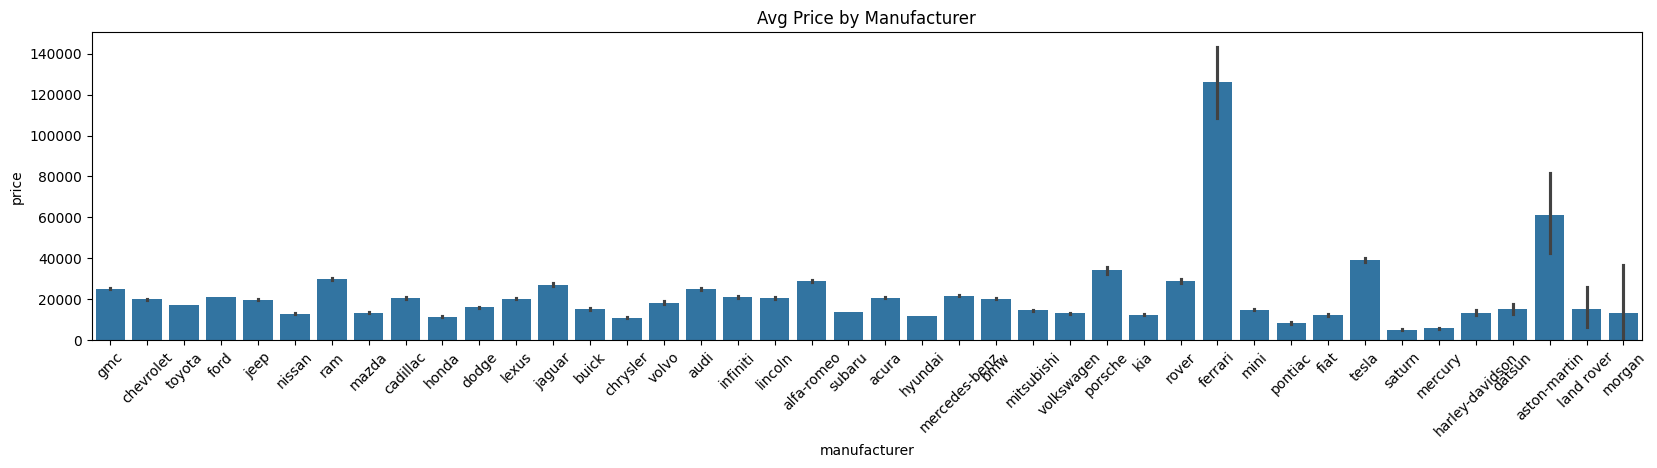

In [118]:
plt.figure(figsize=(20,4))
sns.barplot(
    data=data_clean,
    x='manufacturer',
    y='price',
    estimator='mean'
)
plt.title("Avg Price by Manufacturer")
plt.xticks(rotation=45)
plt.show()

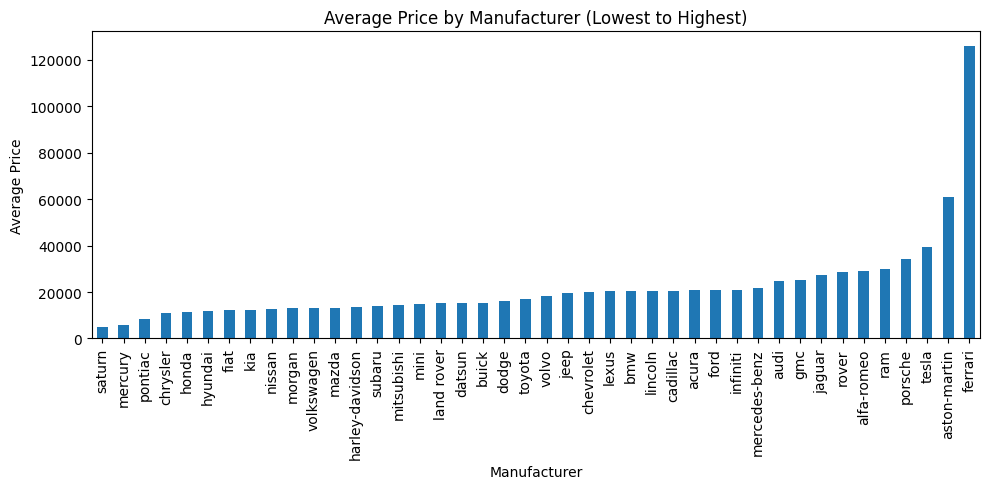

In [119]:
avg_price_by_manufacturer = data_clean.groupby('manufacturer')['price'].mean().sort_values()

# Plot
plt.figure(figsize=(10,5))
avg_price_by_manufacturer.plot(kind='bar')
plt.title("Average Price by Manufacturer (Lowest to Highest)")
plt.xlabel("Manufacturer")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

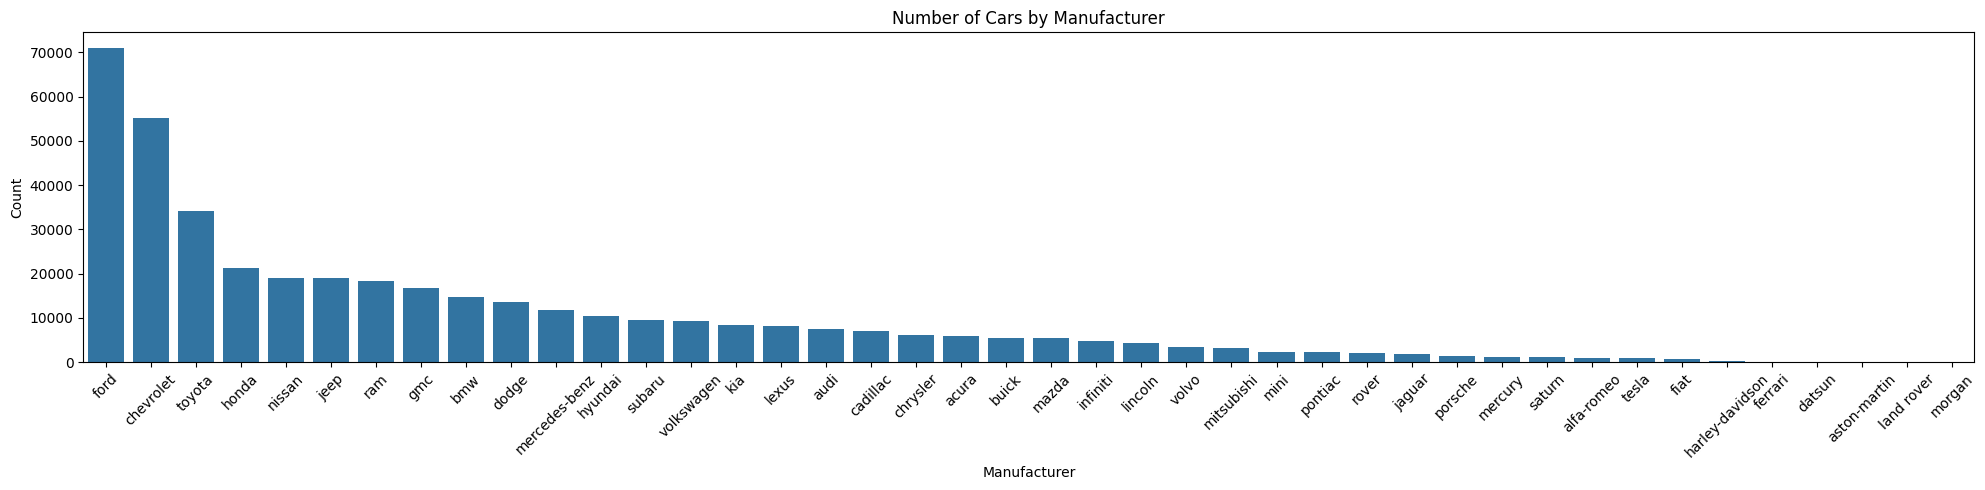

In [120]:
counts_by_manufacturer = data['manufacturer'].value_counts()

# Plot
plt.figure(figsize=(20,5))
sns.barplot(x=counts_by_manufacturer.index, y=counts_by_manufacturer.values)
plt.title("Number of Cars by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [121]:
# Data Prepration --> Modeling --> Evalutation
# LinearRegression
# OneHotEncoder on non-numeric values. e.g for manufacturer
# LinearRegression for  manufacturer with price


# Multiple Regressions
# odometer is numeric value. Check manufacturer + odometer with price prediction. Multiple Regressions

# Nonlinear Features
# manufacturer with price
# manufacturer + odometer with price

In [122]:
#print (data_clean)
data_encoded = pd.get_dummies(data_clean, columns=['manufacturer'])
#print (data_encoded) # data_clean + manufacturer column with 0/1s
print (data_encoded.sample(5))


ohe = OneHotEncoder(sparse_output = False, drop='if_binary')
#ohe.fit(data_clean)
#df_train_clean = ohe.transform(data_clean)
#print (df_train_clean) # Not working
# Fit
# Transform
#df_train_clean = ohe.transform(df_train_clean)
#one_hot_encoded_data = ohe.fit_transform(data_clean)
#print (one_hot_encoded_data)




                id         region  price  odometer state    year  \
305857  7311789298  oklahoma city  33990  34020.00    ok 2017.00   
22971   7306352745    bakersfield   3800 140000.00    ca 2004.00   
321139  7313154584   oregon coast   9990  81059.00    or 2010.00   
284818  7312905989  new hampshire  19990  40627.00    nh 2018.00   
127862  7316499438         hawaii  67495  15700.00    hi 2016.00   

        manufacturer_acura  manufacturer_alfa-romeo  \
305857               False                    False   
22971                False                    False   
321139               False                    False   
284818               False                    False   
127862               False                    False   

        manufacturer_aston-martin  manufacturer_audi  ...  \
305857                      False              False  ...   
22971                       False              False  ...   
321139                      False              False  ...   
284818          

In [123]:
# Assignment 8.3 for which column has correlation 
X = data_clean.drop('price', axis = 1)
y = data_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print(X_train.shape)
print(X_test.shape)



(262893, 6)
(112669, 6)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [124]:
#features = data_encoded[['total_bill']]
                         
X_manufacturer = pd.get_dummies(data_clean['manufacturer'])
#print (X_manufacturer.info())
y = data_clean['price']
f = LinearRegression(fit_intercept = False)
manufacturer_linreg = f.fit(X_manufacturer, y)
#print(manufacturer_linreg)
#print(type(manufacturer_linreg))
manufacturer_linreg.coef_

#manufacturer_encoded_odometer = 


array([ 20825.42824481,  29007.97921478,  61136.61904762,  24877.21342657,
        20343.66652056,  15244.23768903,  20500.63984733,  19949.54907267,
        10937.42846975,  15149.66666667,  15962.89166328, 126008.39506173,
        12214.2153048 ,  20992.41185403,  25041.6665578 ,  13448.24637681,
        11531.01549132,  11840.56190987,  21025.99372338,  27191.49789474,
        19698.85923449,  12426.34706351,  15103.        ,  20336.75688669,
        20439.51706952,  13288.6249004 ,  21816.7087511 ,   5709.16710642,
        14912.39600887,  14559.41036369,  13100.        ,  12891.63493349,
         8369.62443845,  34059.75694444,  29878.31789615,  28772.6314459 ,
         5137.70159027,  13797.3935743 ,  39351.32624113,  17092.3317827 ,
        13189.38188398,  18399.89228886])

In [125]:
# Multiple Regression
data_manufacturer_encoded_odometer = pd.concat([data_clean['odometer'], X_manufacturer], axis=1)
#print (data_manufacturer_encoded_odometer)
manufacturer_odometer_linreg = f.fit(data_manufacturer_encoded_odometer, y)
manufacturer_odometer_linreg.coef_

#manufacturer_odometer_linreg_mse = mean_squared_error(manufacturer_odometer_linreg.predict(data_manufacturer_encoded_odometer), y)
#print(manufacturer_odometer_linreg_mse)

array([-1.40104139e-02,  2.19105060e+04,  2.94969100e+04,  6.14300345e+04,
        2.57966507e+04,  2.14177807e+04,  1.66333310e+04,  2.16148473e+04,
        2.14334279e+04,  1.23692466e+04,  1.61821410e+04,  1.72645239e+04,
        1.26469904e+05,  1.29518464e+04,  2.25201439e+04,  2.65108239e+04,
        1.42092236e+04,  1.31739269e+04,  1.30617626e+04,  2.20444322e+04,
        2.79044088e+04,  2.09309710e+04,  1.35261804e+04,  1.68667251e+04,
        2.16151063e+04,  2.14682575e+04,  1.45565435e+04,  2.29647616e+04,
        7.41940148e+03,  1.58497346e+04,  1.55487248e+04,  1.33014371e+04,
        1.41934491e+04,  1.02682993e+04,  3.52381305e+04,  3.12546862e+04,
        2.98178288e+04,  6.88979099e+03,  1.51757855e+04,  3.98724894e+04,
        1.86165108e+04,  1.43814829e+04,  1.99616708e+04])

In [126]:
# 
pipelined_model = Pipeline([
    ('josh_transform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('josh_regression', LinearRegression())])
pipelined_model.fit(data_clean[['odometer']], data_clean['price'])

,steps,"[('josh_transform', ...), ('josh_regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [127]:
manufacturer_train = X_train[['manufacturer']]
manufacturer_test = X_test[['manufacturer']]
#manufacturer_train.head()

ohe = OneHotEncoder(sparse_output = False, drop='if_binary')
model_2_train = ohe.fit_transform(manufacturer_train)
model_2_test = ohe.transform(manufacturer_test)
model_2 = LinearRegression().fit(model_2_train, y_train)
print(model_2.coef_)

[ -1215.21221002   7040.57393825  42932.7699687    2639.67300444
  -1690.41705474  -6967.20363699  -1433.62548586  -2119.63222161
 -11153.30912735  -5754.54303944  -6001.76705976 101071.11099426
  -9989.7937568    -981.22368017   2940.65413996  -9060.33547348
 -10544.84705004 -10160.52540933  -1179.83372088   5392.04094548
  -2270.55599877  -9710.00536871  -3046.82526939  -1689.45038551
  -1505.81428431  -8718.32594191   -263.82545026 -16367.03374428
  -7391.60527123  -7486.54014247  -2917.39669793  -9139.89777717
 -13849.21692994  12128.56715744   7877.01173289   6270.7481147
 -16776.39273497  -8232.4349649   16869.95134956  -4995.52291821
  -8828.64649795  -3721.34204122]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [128]:
# LinearRegression model on 'manufacturer', 'odometer' with 'price'
# Predict 
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer']), 
                                          remainder='passthrough',force_int_remainder_cols=False)
col_transformer.fit_transform(X_train[['manufacturer', 'odometer']])

pipe_1 = Pipeline([('col_transformer', col_transformer),('linreg', LinearRegression())])
pipe_1.fit(X_train[['manufacturer', 'odometer']], y_train)

pipe_1_train_preds = pipe_1.predict(X_train[['manufacturer', 'odometer']])
pipe_1_test_preds = pipe_1.predict(X_test[['manufacturer', 'odometer']])

#MSE
pipe_1_train_mse = mean_squared_error(y_train, pipe_1_train_preds)
pipe_1_test_mse = mean_squared_error(y_test, pipe_1_test_preds)

print(f'Train MSE: {pipe_1_train_mse: .2f}')
print(f'Test MSE: {pipe_1_test_mse: .2f}')

#RMSE
pipe_1_train_rmse = np.sqrt(pipe_1_train_mse)
pipe_1_test_rmse = np.sqrt(pipe_1_test_mse)

print(f'Train RMSE: {pipe_1_train_rmse: .2f}')
print(f'Test RMSE: {pipe_1_test_rmse: .2f}')



Train MSE:  216723965.09
Test MSE:  214549394.08
Train RMSE:  14721.55
Test RMSE:  14647.50


In [129]:
# LinearRegression model on 'manufacturer', 'odometer','year' with 'price'
# Predict 
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer']), 
                                          remainder='passthrough',force_int_remainder_cols=False)
col_transformer.fit_transform(X_train[['manufacturer', 'odometer','year']])

pipe_2 = Pipeline([('col_transformer', col_transformer),('linreg', LinearRegression())])
pipe_2.fit(X_train[['manufacturer', 'odometer','year']], y_train)

pipe_2_train_preds = pipe_2.predict(X_train[['manufacturer', 'odometer','year']])
pipe_2_test_preds = pipe_2.predict(X_test[['manufacturer', 'odometer','year']])

#MSE
pipe_2_train_mse = mean_squared_error(y_train, pipe_2_train_preds)
pipe_2_test_mse = mean_squared_error(y_test, pipe_2_test_preds)

print(f'Train MSE: {pipe_2_train_mse: .2f}')
print(f'Test MSE: {pipe_2_test_mse: .2f}')

#RMSE
pipe_2_train_rmse = np.sqrt(pipe_2_train_mse)
pipe_2_test_rmse = np.sqrt(pipe_2_test_mse)

print(f'Train RMSE: {pipe_2_train_rmse: .2f}')
print(f'Test RMSE: {pipe_2_test_rmse: .2f}')


Train MSE:  193902001.04
Test MSE:  189432576.12
Train RMSE:  13924.87
Test RMSE:  13763.45


In [136]:
# Create the Polynomial Regression Pipeline on 'manufacturer', 'odometer' with 'price'
pipe_poly = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])

pipe_poly.fit(X_train[['manufacturer', 'odometer']], y_train)

pipe_poly_train_preds = pipe_poly.predict(X_train[['manufacturer', 'odometer']])
pipe_poly_test_preds = pipe_poly.predict(X_test[['manufacturer', 'odometer']])

#MSE
pipe_poly_train_mse = mean_squared_error(y_train, pipe_poly_train_preds)
pipe_poly_test_mse = mean_squared_error(y_test, pipe_poly_test_preds)

print(f'Train MSE: {pipe_poly_train_mse: .2f}')
print(f'Test MSE: {pipe_poly_test_mse: .2f}')

#RMSE
pipe_poly_train_rmse = np.sqrt(pipe_poly_train_mse)
pipe_poly_test_rmse = np.sqrt(pipe_poly_test_mse)

print(f'Train RMSE: {pipe_poly_train_rmse: .2f}')
print(f'Test RMSE: {pipe_poly_test_rmse: .2f}')


Train MSE:  225048524.61
Test MSE:  219977296.23
Train RMSE:  15001.62
Test RMSE:  14831.63


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [131]:
# With the model I used pipe_1 which is for Linear Regression model trained on 'manufacturer' and 'odometer'
# I got following
# Train MSE:  216723965.09
# Test MSE:  214549394.08
# Train RMSE:  14721.55
# Test RMSE:  14647.50

# My Train and Test RSME are very near. So the performance is similar with Train and Test sets. 
# I definately have prediction error higher so the steps I can use to improve are 

# The current features 'manufacturer' and 'odometer' are likely insufficient to predict price accurately.
# I need to consider 'condition', 'year' etc
# I can also look into sked data as dataset has some cars with much higher price



In [132]:
# With pipe_2 model Linear Regression model trained on 'manufacturer', 'odometer' and 'year'
# I got following
# Train MSE:  193902001.04
# Test MSE:  189432576.12
# Train RMSE:  13924.87
# Test RMSE:  13763.45

# Adding year infromation is slightly better than previous model. 


In [133]:
# Tried above same models by removing sked data. 
# ninety_ninth_percentile_price = data['price'].quantile(0.99) = 66995.00
# Used that in filtering out the data 
# data_filtered = data[(data['price'] > 0) & (data['price'] <= ninety_ninth_percentile_price)]

# pipe_1 data model
# Train MSE:  171432102.96
# Test MSE:  171882650.89
# Train RMSE:  13093.21
# Test RMSE:  13110.40

# pipe_2 data model
# Train MSE:  149290346.62
# Test MSE:  148600649.74
# Train RMSE:  12218.44
# Test RMSE:  12190.19

# It's better than before 


In [ ]:
# We can filter out the data by top 20 'manufacturer'

# We can also consider 'condition' column. Keep in mind to replace NaN with 'missing' or 'other' as ~38% of data doesn't have that information. 


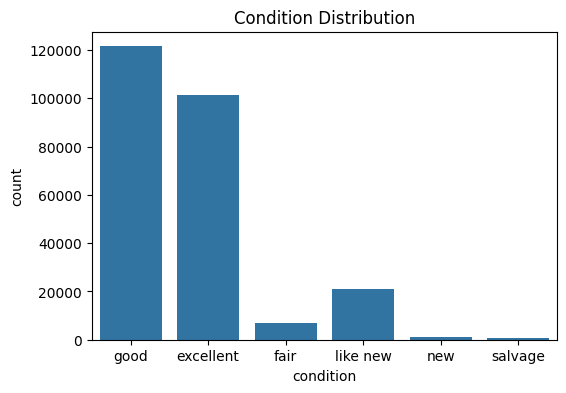

In [135]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='condition')
plt.title("Condition Distribution")
plt.show()